In [64]:
#Dependecies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [65]:
#Import CSV file
emission = pd.read_csv("ghg-emissions.csv")

In [66]:
emission.head()

,Country/Region,unit,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,China,MtCO2e,2873.71,3023.38,3154.54,3377.79,3528.81,3918.30,3954.75,3963.61,...,9046.19,9872.37,10364.83,10690.04,11144.76,11155.76,11149.68,11207.66,11408.26,11705.81
1,United States,MtCO2e,5543.47,5501.92,5583.80,5691.26,5782.20,5843.90,6010.62,6258.47,...,5793.66,6041.59,5796.78,5550.87,5690.79,5711.15,5586.69,5676.92,5613.64,5794.35
2,India,MtCO2e,1009.44,1064.49,1096.71,1128.44,1174.78,1240.44,1289.63,1348.09,...,2467.78,2576.93,2610.32,2758.53,2816.49,2988.34,3002.17,3073.24,3202.82,3346.63
3,Russia,MtCO2e,2885.12,2788.70,2551.94,2294.62,2011.47,1930.88,1889.18,1755.59,...,1575.54,1690.93,1864.86,1886.41,1844.48,1841.26,1791.21,1918.26,1939.26,1992.08
4,Indonesia,MtCO2e,1257.1,1274.43,1295.01,1311.27,1327.87,1360.88,1179.00,2142.82,...,1483.61,1125.25,1675.72,1695.27,1636.17,2016.28,2070.24,1453.23,1466.05,1703.86


In [67]:
#clean data by dropping the uni columns
#clean data by removing rows with no countries or data (dropNA)
clean = emission.drop(columns=["unit"])
emission_df = clean.dropna()

emission_df

,Country/Region,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,China,2873.71,3023.38,3154.54,3377.79,3528.81,3918.30,3954.75,3963.61,4103.23,...,9046.19,9872.37,10364.83,10690.04,11144.76,11155.76,11149.68,11207.66,11408.26,11705.81
1,United States,5543.47,5501.92,5583.80,5691.26,5782.20,5843.90,6010.62,6258.47,6293.80,...,5793.66,6041.59,5796.78,5550.87,5690.79,5711.15,5586.69,5676.92,5613.64,5794.35
2,India,1009.44,1064.49,1096.71,1128.44,1174.78,1240.44,1289.63,1348.09,1382.26,...,2467.78,2576.93,2610.32,2758.53,2816.49,2988.34,3002.17,3073.24,3202.82,3346.63
3,Russia,2885.12,2788.70,2551.94,2294.62,2011.47,1930.88,1889.18,1755.59,1740.23,...,1575.54,1690.93,1864.86,1886.41,1844.48,1841.26,1791.21,1918.26,1939.26,1992.08
4,Indonesia,1257.1,1274.43,1295.01,1311.27,1327.87,1360.88,1179.00,2142.82,1373.56,...,1483.61,1125.25,1675.72,1695.27,1636.17,2016.28,2070.24,1453.23,1466.05,1703.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Kiribati,0.04,0.04,0.04,0.05,0.04,0.05,0.05,0.05,0.05,...,0.08,0.08,0.08,0.08,0.09,0.09,0.09,0.10,0.10,0.11
189,Cook Islands,0.03,0.03,0.03,0.03,0.03,0.04,0.04,0.05,0.05,...,0.07,0.07,0.08,0.08,0.08,0.08,0.08,0.09,0.09,0.10
190,Nauru,0.13,0.13,0.13,0.12,0.12,0.11,0.11,0.11,0.11,...,0.05,0.05,0.05,0.05,0.05,0.06,0.06,0.07,0.07,0.08
191,Tuvalu,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.03,0.03


In [134]:
#swap the column and rows for charting puposes
emission_T = emission_df.transpose()

#make the first row the new header for the index
emission_T.columns = (emission_T.iloc[0])
#drop first row after renaming index
emission_C = emission_T.drop(emission_T.index[0])
#reset the index to bring years back to column and rename transposed column heading to make more sense.
emission_C = emission_C.reset_index()
#Fix the column data types. index = date as integergs, countries as floats

#print(emission_C.dtypes)# - used to check DF types
#remove "FALSE" string data and replace with 0
emission_D = emission_C.replace("FALSE", 0)
#convert all data to floats
emission_D = emission_D.astype(float)
#convert first column years to a string (or integer)
emission_D = emission_D.astype({"index": int})

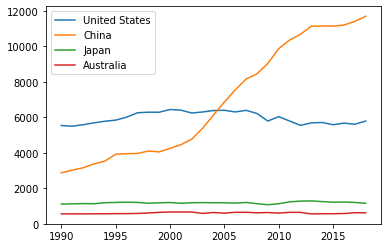

In [137]:
plt.plot(emission_D["index"], emission_D["United States"], label="United States")
plt.plot(emission_D["index"], emission_D["China"], label="China")
plt.plot(emission_D["index"], emission_D["Japan"], label="Japan")
plt.plot(emission_D["index"], emission_D["Australia"], label="Australia")
plt.legend()